In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import collections
from crate.client import connect

conn = connect('localhost:4201')
cursor = conn.cursor()

cursor.execute('select statement from benchmarks order by ended desc')
statements = collections.OrderedDict((k[0], None) for k in cursor.fetchall())
statements = iter(statements.keys())
statement = next(statements)
statement

'insert into geonames ("name", "geonameid", "feature_class", "longitude", "timezone", "feature_code", "dem", "country_code", "admin1_code", "latitude", "asciiname", "population") values (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)'

In [2]:
cursor.execute("""
select 
    version_info['number'] || '-' || version_info['hash'],
    runtime_stats['mean'],
    runtime_stats['mean'] + runtime_stats['stdev'],
    runtime_stats['mean'] - runtime_stats['stdev']
from
    benchmarks
where
    statement = ?
order by 1
""", (statement,))

rows = cursor.fetchall()
rows

[['0.54.9-25df61cf2368e81bdd1df8d5a64b6d145a1ad1ae',
  604.37,
  929.972616949195,
  278.76738305080505],
 ['0.55.0-20a200f06fa6c527b1c21a32d547164425a631bf',
  0.248,
  0.7740919812853763,
  -0.27809198128537627],
 ['0.55.0-20a200f06fa6c527b1c21a32d547164425a631bf',
  597.679,
  873.9767278107682,
  321.3812721892317],
 ['0.55.0-4713a5498fadf14b2359e13c641e6734f8189dc5',
  597.628977203,
  894.4507455800599,
  300.8072088259401],
 ['0.55.0-4713a5498fadf14b2359e13c641e6734f8189dc5',
  676.050194787,
  1054.3487271537451,
  297.751662420255],
 ['0.55.0-4713a5498fadf14b2359e13c641e6734f8189dc5',
  590.2940633359999,
  902.5156530733303,
  278.0724735986695],
 ['0.55.0-6a67cbbb91756dc0a4a40dd5f19b1cf2ecd64256',
  578.844,
  879.4351021215942,
  278.25289787840586],
 ['0.55.0-6a67cbbb91756dc0a4a40dd5f19b1cf2ecd64256',
  0.21,
  0.6319929834465,
  -0.21199298344650006],
 ['0.55.0-6a67cbbb91756dc0a4a40dd5f19b1cf2ecd64256',
  571.01,
  892.1716021174927,
  249.8483978825073],
 ['0.55.0-6a67cb

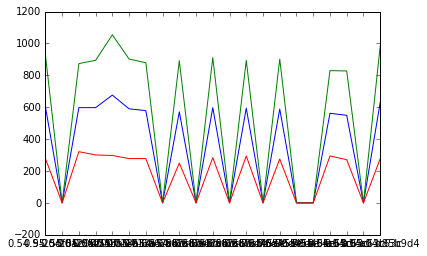

In [4]:
versions = [row[0][:14] for row in rows]
line1 = [row[1] for row in rows]
line2 = [row[2] for row in rows]
line3 = [row[3] for row in rows]
plt.xticks(range(len(versions)), versions)
x = list(range(len(versions)))
plt.plot(x, line1, label='mean')
plt.plot(x, line2, label='mean+stdev')
plt.plot(x, line3, label='mean-stdev')